This code:
               <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(1) interactively select an Area of Interest (AOI) on an pop-up amplitude SAR image. To do this, uncomment line 41 and 53
               <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(2) plot the selected land type on an amplitude SAR image 
               <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(3) save the selected land type polygon in a npy file for further analysis
               <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   Heming Liao, hliao@alaska.edu


In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.path import Path
import IO
import re
import matplotlib
from scipy import ndimage
%run UAVSAR_InSAR_proc.ipynb
%matplotlib inline

Processing data: NISARA
['190606', '190620', '190701', '190725', '190812', '190923', '190930']
Processing data: winnip
['120617', '120619', '120622', '120623', '120625', '120627', '120629', '120703', '120705', '120708', '120710', '120713', '120714', '120717']
Processing data: SanAnd
['090218', '090718', '090908', '091002', '091102', '091117', '091203', '100114', '100115', '100409', '100510', '100511', '100617', '100712', '100810', '100925', '101025', '101110', '101201', '110110', '110330', '110512', '110616', '110712', '110720', '110829', '111003', '111102', '111207', '120105', '120213', '120322', '120424', '120530', '120718', '120815', '120924', '130103', '130130', '130423', '130529', '130719', '131031', '131125', '140117', '140212', '140402', '140515', '140616', '140814', '140829', '160323', '160621']
Processing data: SDelta
['090718', '090908', '091002', '091102', '091203', '100114', '100303', '100409', '100510', '100617', '100712', '100810', '100925', '101025', '101130', '110110', 

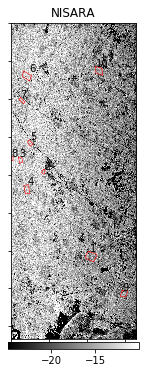

In [20]:
site_list = ('NISARA_06800','winnip_31606','SanAnd_05508','SDelta_23518')

SLC_data_dir = '/Users/hliao/Documents/UAF_work/coherence/npy_new_data'
output_dir1 = '/Users/hliao/Documents/UAF_work/coherence/npy_new_data_results/amp_TS'
output_dir2 = '/Users/hliao/Documents/UAF_work/coherence/npy_new_data_results/selected_AOIs'

polarizations = ['HH','HV','VH','VV']

site_temporal_coverage = {site_list[0]:('190606','190930'), site_list[1]:('120617','120717'),
                          site_list[2]:('090908','120924'), site_list[3]:('090908','120924')}

for site in site_list:
    
    print('Processing data: ' + site.split("_")[0])
    
    index = site_list.index(site)
    
    # acquisitions' date list for UAVSAR site: site
    temp = [fileName.split('/')[7].split('_')[1]
            for fileName in glob.glob(os.path.join(SLC_data_dir,site.split('_')[0]+'*.npy'))]
    acq_dates = sorted(temp)
    print(acq_dates)
    
        
    slc_cpx = np.load(os.path.join(SLC_data_dir, site.split('_')[0] + '_' + acq_dates[0] + 
                                '_rg6_azi16_ML_SLC.npy'))
    intensity = slc_cpx[:,:,0]*np.conj(slc_cpx[:,:,0])
    amp = 10*np.log10(intensity.real+0.0001) # add 0.001 to avoid zero values in log calculation
    
    # save amp data
    amp_out_fileName = site.split('_')[0] + '_' + acq_dates[0] + '_amp.npy'
    #np.save(amp_out_fileName,amp)
    
    # save amplitude images
    out_fig = site.split('_')[0] + '_' + acq_dates[0] + '_amplitude.png'
    #image.imsave(out_fig,amp,cmap='gray')
    
    amp_filt = ndimage.median_filter(amp, 3)
    amp_filt_sorted = sorted(set(amp_filt.flatten()))

    ## enable the following lines to allow interactively select land cover polygon from a pop-up UI    
    #matplotlib.use('TkAgg')
    
    # amplitude images display
    fig1,axes = plt.subplots(nrows=1,ncols=1,figsize=(3,6))
    img = axes.imshow(amp_filt,cmap='gray', vmin=amp_filt_sorted[int(0.05*len(amp_filt_sorted))],
                                       vmax=amp_filt_sorted[int(0.95*len(amp_filt_sorted))])
    axes.set_xticklabels([])
    axes.set_yticklabels([])
    axes.set_title(site.split("_")[0])
    fig1.colorbar(img,ax=axes,pad=0.01,orientation='horizontal',fraction=0.02)
    
    ## enable the following lines to allow interactively select land cover polygon from a pop-up UI
    #pts_list = plt.ginput(-1) #number of clicks
        
    
    ## save the selected AOIs polygon mask as well as the outline points
        

    sites_land_type = {'NISARA':{'NISARA_veg1':[(1021.8939636142559, 3013.167027477991), (995.783923959012, 3049.721082995332), 
                                                (984.0344061141523, 3096.7191543747713), (1027.1159715453048, 3120.218190064491), 
                                                (1092.3910706834145, 3147.633731702497), (1110.6680984420855, 3112.3851781679177), 
                                                (1128.945126200756, 3071.9146167022895), (1128.945126200756, 3047.110079029808), 
                                                (1067.5865330109327, 3027.5275492883748), (1021.8939636142559, 3013.167027477991)],
                                 'NISARA_veg2': [(435.58010231102946, 1931.230828423334), (453.59850939897024, 1938.160984995619), 
                                                 (450.82644677005635, 1963.1095486558447), (439.73819625440035, 1996.3743002028125), 
                                                 (417.5616952230886, 1986.6720810016136), (406.4734447074327, 1976.9698618004145), 
                                                 (414.7896325941747, 1949.249235511275),(435.58010231102946, 1931.230828423334)],
                                 'NISARA_veg3': [(104.38422624783217, 1777.398514051415), (140.00532477704363, 1763.1500746397305), 
                                                 (161.37798389457052, 1836.1733266246142), (115.07055580659559, 1852.2028209627592),
                                                (104.38422624783217, 1777.398514051415)],
                                 'NISARA_veg4': [(227.5575681257411, 2134.3630063454125), (172.7061360119211, 2142.9335426131966), 
                                                 (194.9895303081605, 2256.0646213479504), (253.26917692909427, 2242.3517633194956),
                                                (227.5575681257411, 2134.3630063454125)],
                                 'NISARA_veg5': [(287.9063064185428, 1598.564552317098), (245.57143575160075, 1541.6770698583946), 
                                                 (220.4351062931039, 1569.4593287335756), (256.1551534183362, 1626.346811192279),
                                                 (287.9063064185428, 1598.564552317098)],
                                 'NISARA_veg6': [(247.05365465712782, 765.1233537351351), (150.67038293395473, 706.5374434720298), 
                                                 (169.56906366398863, 636.6123247709043), (275.4016757521787, 697.0881031070128),
                                                 (247.05365465712782, 765.1233537351351)],
                                 'NISARA_veg7': [(125.91669992385758, 986.4062050426286), (185.82591366010016, 1040.6636061622446), 
                                                 (167.74011328689485, 1066.6619441987273), (108.96126207397757, 1011.274180555786),
                                                 (125.91669992385758, 986.4062050426286)],
                                 'NISARA_veg8': [(4.932440426702357, 1765.8183033614364), (29.774513633555415, 1764.7832169778173), 
                                                 (29.774513633555415, 1815.5024497751424), (2.8622676594646066, 1818.607708925999),
                                                 (4.932440426702357, 1765.8183033614364)],
                                 'NISARA_veg9': [(1470.3860620041169, 3522.501449541399), (1538.8258401307849, 3526.8699460175694), 
                                                 (1516.255275003905, 3612.7837100489187), (1441.99083490901, 3601.134386112464),
                                                 (1470.3860620041169, 3522.501449541399)],
                                 'NISARA_veg10': [(1118.4848520445382, 576.1431867117377), (1200.0512309434714, 600.7425708241144), 
                                                  (1210.408866359209, 692.6665851387852), (1121.0742608984726, 662.8883833185397),
                                                  (1118.4848520445382, 576.1431867117377)]}, 
                       'SDelta':{'SDelta_agr1': [(893.9773624264976, 1633.4221645473635), (822.1005929952146, 1720.2732609434972), 
                                                 (765.1981505287822, 1651.3913569051845), (843.0646507460054, 1566.037693205536),
                                                 (893.9773624264976, 1633.4221645473635)],
                                 'SDelta_agr2': [(16.69305241029309, 1357.765085541469), (38.71813171550497, 1313.7149269310453), 
                                                 (82.76829032592866, 1359.2334241618164), (51.93317929863207, 1412.0936144943248),
                                                 (16.69305241029309, 1357.765085541469)],
                                 'SDelta_agr3': [(534.5315426770815, 1117.4072139193977), (604.8487087588013, 1114.7703201913332), 
                                                 (667.2551936563277, 1179.813698816924), (618.9121419751452, 1239.583289986386),
                                                 (534.5315426770815, 1117.4072139193977)],
                                 'SDelta_agr4': [(836.1766340832739, 1172.6718376814913), (852.344460383178, 1140.3361850816832), 
                                                 (887.6197177647869, 1178.5510472450928), (867.0424842921817, 1209.4168974540005),
                                                 (836.1766340832739, 1172.6718376814913)],
                                 'SDelta_agr5': [(954.4703554692835, 1552.765813932654), (902.8121311895266, 1633.7753020077275), 
                                                 (976.7773159537239, 1731.221497808178), (1007.302630300853, 1680.7373240802337), 
                                                 (990.8659225754759, 1657.2563130439805), (1006.1285797490403, 1612.6423920750997),
                                                 (954.4703554692835, 1552.765813932654)],
                                 'SDelta_agr6': [(682.2588660222585, 1346.501797147262), (714.963575867056, 1388.8255392993526), 
                                                 (655.3255755618372, 1496.558701141038), (613.0018334097465, 1477.3206365264514),
                                                 (682.2588660222585, 1346.501797147262)],
                                 'SDelta_agr7': [(1188.9662796717603, 621.1732923775298), (1244.1384753843802, 659.1808049795568), 
                                                 (1218.391450718491, 702.0925127560389), (1165.6713525930986, 656.7287073923293),
                                                 (1188.9662796717603, 621.1732923775298)],
                                 'SDelta_agr8': [(799.6847924640681, 709.3127687667592), (836.4817134831718, 647.339007050374), 
                                                 (782.2546719813347, 606.6687259239962), (755.1411512304162, 666.7058075867443),
                                                 (799.6847924640681, 709.3127687667592)],
                                 'SDelta_agr9': [(1379.4906697875529, 1187.3787441503791), (1415.1922015300001, 1114.1906040783624), 
                                                 (1445.5385035110803, 1137.396599710953), (1404.481742007266, 1207.014586608725),
                                                 (1379.4906697875529, 1187.3787441503791)],
                                 'SDelta_agr10': [(1488.9765902282165, 2247.087810443111), (1575.5133987329534, 2239.49686232866), 
                                                  (1575.5133987329534, 2119.5598821203407), (1488.9765902282165, 2124.114450989011),
                                                  (1488.9765902282165, 2247.087810443111)]},
                       'winnip':{'winnip_agr1': [(408.1600709191797, 1171.7406212757037), (440.25316678806104, 1121.8180277018885), 
                                                 (521.0802230504288, 1239.4927125544532), (485.4212276405607, 1292.9812056692556),
                                                 (408.1600709191797, 1171.7406212757037)],
                                 'winnip_agr2': [(1503.4687853740043, 511.6466451987235), (1444.0274384382196, 577.0321268280868), 
                                                 (1533.1894588418968, 689.9706860060787), (1598.5749404712606, 630.5293390702936),
                                                 (1503.4687853740043, 511.6466451987235)],
                                 'winnip_agr3': [(1429.5207955448718, 92.87627277348037), (1532.7064012216513, 212.14275206222544), 
                                                 (1586.3093132615368, 153.84958521885005), (1476.4233435797714, 38.60332433309645),
                                                 (1429.5207955448718, 92.87627277348037)],
                                 'winnip_agr4': [(292.43078900298724, 1232.9514851821364), (358.09071126878007, 1125.5079760199292), 
                                                 (393.90521432284913, 1179.2297306010328), (322.276208214711, 1286.67323976324),
                                                 (292.43078900298724, 1232.9514851821364)],
                                 'winnip_agr5': [(470.4602821124355, 75.74551561595581), (500.33705155442397, 27.94268450877371), 
                                                 (595.9427137687875, 135.49905449993275), (548.1398826616056, 189.27723949551182),
                                                 (470.4602821124355, 75.74551561595581)], 
                                 'winnip_agr6': [(598.3866085076613, 143.97455645878927), (634.08872295382, 90.42138478955076), 
                                                 (723.3440090692168, 209.4284329434131), (675.7411898076718, 257.03125220495895),
                                                 (598.3866085076613, 143.97455645878927)],
                                 'winnip_agr7': [(72.11358747189756, 3712.8692148310683), (23.51563221913831, 3829.5043074376904), 
                                                 (47.81460984551795, 3878.1022626904496), (98.84246286091518, 3768.7568633717415),
                                                 (72.11358747189756, 3712.8692148310683)],
                                 'winnip_agr8': [(13.912247678243205, 3908.1861642758386), (34.16772500042589, 3855.5219232381637), 
                                                 (74.67867964479115, 3940.594927991331), (51.722472012984156, 3994.609534183818),
                                                 (13.912247678243205, 3908.1861642758386)],
                                 'winnip_agr9': [(414.0260516821404, 2623.686505245426), (473.1736452634209, 2541.865667457988), 
                                                 (429.7987433038152, 2482.718073876708), (376.5659090806628, 2566.510498116855),
                                                 (414.0260516821404, 2623.686505245426)],
                                 'winnip_agr10': [(894.7092482928774, 1371.1825954037354), (943.3959074139389, 1316.5945230558787), 
                                                  (990.6072132283015, 1374.133302017133), (944.8712607206377, 1430.1967276716887),
                                                  (894.7092482928774, 1371.1825954037354)],
                                 'winnip_agr11': [(994.0342058325398, 1370.0997987075095), (1044.4664072956457, 1308.9698575401083), 
                                                  (1096.4268572879369, 1370.0997987075095), (1045.994655824831, 1429.7014913457258),
                                                  (994.0342058325398, 1370.0997987075095)]},
                       'SanAnd':{'SanAnd_bareland1': [(975.1952295446081, 3930.6471507699716), (1016.7607392651532, 3847.516131328881), 
                                                      (1129.5814085066336, 3912.833360889738), (1058.3262489856988, 4007.840240250984),
                                                      (975.1952295446081, 3930.6471507699716)],
                                 'SanAnd_bareland2': [(1076.9424646554426, 3839.414444950571), (1136.4751733117882, 3750.115381966052), 
                                                      (1080.0757651110396, 3704.6825253598936), (1023.6763569102909, 3798.681539027808),
                                                      (1076.9424646554426, 3839.414444950571)],
                                 'SanAnd_bareland3': [(734.9961517908505, 4157.446132728079), (777.1728103776677, 4075.4359632537116), 
                                                      (852.1535367542319, 4077.779110952979), (802.9474350696116, 4159.789280427346),
                                                      (734.9961517908505, 4157.446132728079)],
                                 'SanAnd_bareland4': [(524.5571903123955, 3828.2912684470093), (507.21455253036527, 3860.808714288316), 
                                                      (546.2354875399334, 3951.857562643975), (619.9416981135621, 4047.2420704451415), 
                                                      (667.6339520141453, 3967.0323707032517), (524.5571903123955, 3828.2912684470093)],
                                 'SanAnd_bareland5': [(355.18657086138035, 3836.4378107136104), (414.1168902940351, 3740.4655762090015), 
                                                      (456.2099756030742, 3780.8749381056787), (402.3308264075042, 3883.5820662597343),
                                                      (355.18657086138035, 3836.4378107136104)],
                                 'SanAnd_bareland6': [(101.50906330426503, 3412.3247544800834), (178.4964963031818, 3433.7101525353382), 
                                                      (173.15014678936814, 3503.212696214916), (95.09344388768861, 3475.411678743085),
                                                      (101.50906330426503, 3412.3247544800834)],
                                 'SanAnd_bareland7': [(365.34550789195407, 3551.493747539969), (341.0310806276684, 3610.760163996665), 
                                                      (377.50272152409684, 3648.7514565971114), (410.93505901248966, 3591.004691844433),
                                                      (365.34550789195407, 3551.493747539969)],
                                 'SanAnd_bareland8': [(346.2326577727742, 4140.956863897332), (384.1110153445899, 4084.1393275396094), 
                                                      (308.35430020095856, 4005.4688925827613), (283.58768178861754, 4060.8295690338764),
                                                      (346.2326577727742, 4140.956863897332)],
                                 'SanAnd_bareland9': [(558.5423065021022, 4156.333128672873), (605.9589567567334, 4072.879824224722), 
                                                      (475.0890020539513, 4089.949818316389),(558.5423065021022, 4156.333128672873)],
                                 'SanAnd_bareland10': [(676.2220611093948, 3958.4243007659747), (773.9486320526279, 4056.150871709208), 
                                                       (803.6915014701336, 4007.2875862375913), (703.8404398542215, 3915.9344873123955),
                                                       (676.2220611093948, 3958.4243007659747)]}
                      }
    

    ny, nx = amp_filt.shape

    # Create vertex coordinates for each grid cell...
    # (<0,0> is at the top left of the grid in this system)
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()

    points = np.vstack((x,y)).T
    
    polygons = []
    for count,poly in enumerate(sites_land_type[site.split("_")[0]].keys()):
        points_xx, points_yy = [],[]
        for point in sites_land_type[site.split("_")[0]][poly]:
            points_xx.append(point[0])
            points_yy.append(point[1])
        
        # plot selected polygon outline
        axes.plot(points_xx,points_yy,'r',LineWidth=0.6)
        plt.text(np.median(points_xx),min(points_yy)-1,str(count+1),color='k')
            
        # selected polygon mask
        path = Path(sites_land_type[site.split("_")[0]][poly])
        grid = path.contains_points(points)
        poly_mask = grid.reshape(ny,nx)
        polygons.append( poly_mask )
    
        # save the land cover polygon mask
        land_cover_mask_file = os.path.join(output_dir2,poly + '_' + 'polygon_mask.npy')
        np.save(land_cover_mask_file,poly_mask)
        
        polygon_file = os.path.join(output_dir2,poly  + '_' + 'polygon_points.npy')
        poly_points = np.vstack( (np.array(points_xx),np.array(points_yy)) )
        np.save(polygon_file,poly_points)

    #fig1.subplots_adjust(left=0.04, bottom=0.04, right=0.95, top=0.95, wspace=0.02, hspace=0.05)
    out_fig = os.path.join(output_dir1,site.split("_")[0]+'_amplitude.png')
    fig1.savefig(out_fig,dpi=300)
    
    # display only the first images
    if (index != 0):
        plt.close(fig1)




In [11]:
print(sites_land_type[site.split("_")[0]][poly])

[(1021.8939636142559, 3013.167027477991), (995.783923959012, 3049.721082995332), (984.0344061141523, 3096.7191543747713), (1027.1159715453048, 3120.218190064491), (1092.3910706834145, 3147.633731702497), (1110.6680984420855, 3112.3851781679177), (1128.945126200756, 3071.9146167022895), (1128.945126200756, 3047.110079029808), (1067.5865330109327, 3027.5275492883748), (1021.8939636142559, 3013.167027477991)]
